In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 1. Fetch the dataset with pandas DataFrame support
housing = fetch_california_housing(as_frame=True)

# 2. Combine the features and target into a single DataFrame
df = housing.frame   # This automatically includes both data features and the target column
# Alternatively, you can do:
# df = pd.concat([housing.data, housing.target.rename("MedHouseVal")], axis=1)

# 3. Save the DataFrame to a CSV file
df.to_csv("california_housing.csv", index=False)

print("CSV file 'california_housing.csv' has been created successfully!")


CSV file 'california_housing.csv' has been created successfully!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Display the first few rows of the dataset
print("--- Dataset Head ---")
print(df.head())

--- Dataset Head ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
# Display basic information about the dataset
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Display descriptive statistics
print("\n--- Dataset Description ---")
print(df.describe())


--- Dataset Description ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min

In [ ]:
# --- 2.1 Check for Missing Values ---
print("\n--- Missing Values Check ---")
print(df.isnull().sum())
# Output: All features should show 0 missing values for this dataset.
# If there were missing values, you would use df.fillna() or df.dropna().


--- Missing Values Check ---
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
# --- 2.2 Feature Engineering (Optional but Recommended) ---
# For this dataset, features are already quite good.
# Let's create a simple new feature: Average rooms per person
df['Avg_Rooms_Per_Person'] = df['AveRooms'] / df['AveOccup']
print("\n--- Dataset Head with new feature ---")
print(df.head())


--- Dataset Head with new feature ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  Avg_Rooms_Per_Person  
0    -122.23        4.526              2.732919  
1    -122.22        3.585              2.956685  
2    -122.24        3.521              2.957661  
3    -122.25        3.413              2.283154  
4    -122.25        3.422              2.879646  


In [ ]:
# --- 2.3 Separate Features (X) and Target (y) ---
X = df.drop('MedHouseVal', axis=1) # Features are all columns except 'MedHouseVal'
y = df['MedHouseVal'] # Target variable is 'MedHouseVal'

In [ ]:
# --- 2.4 Split Data into Training and Testing Sets ---
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (16512, 9)
Testing features shape: (4128, 9)
Training target shape: (16512,)
Testing target shape: (4128,)


In [ ]:
# Scaling is crucial for many algorithms (Linear Regression, Ridge, etc.)
# It brings all features to a similar scale, preventing features with larger values
# from dominating the learning process.
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert scaled arrays back to DataFrames with column names for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("\n--- Scaled Training Data Head (first 5 rows) ---")
print(X_train_scaled.head())


--- Scaled Training Data Head (first 5 rows) ---
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
3 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
4 -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832  0.532084   

   Longitude  Avg_Rooms_Per_Person  
0   1.272587             -0.552017  
1   0.709162              0.526956  
2  -0.447603              0.082291  
3   1.232698             -0.869143  
4  -0.108551              0.661600  


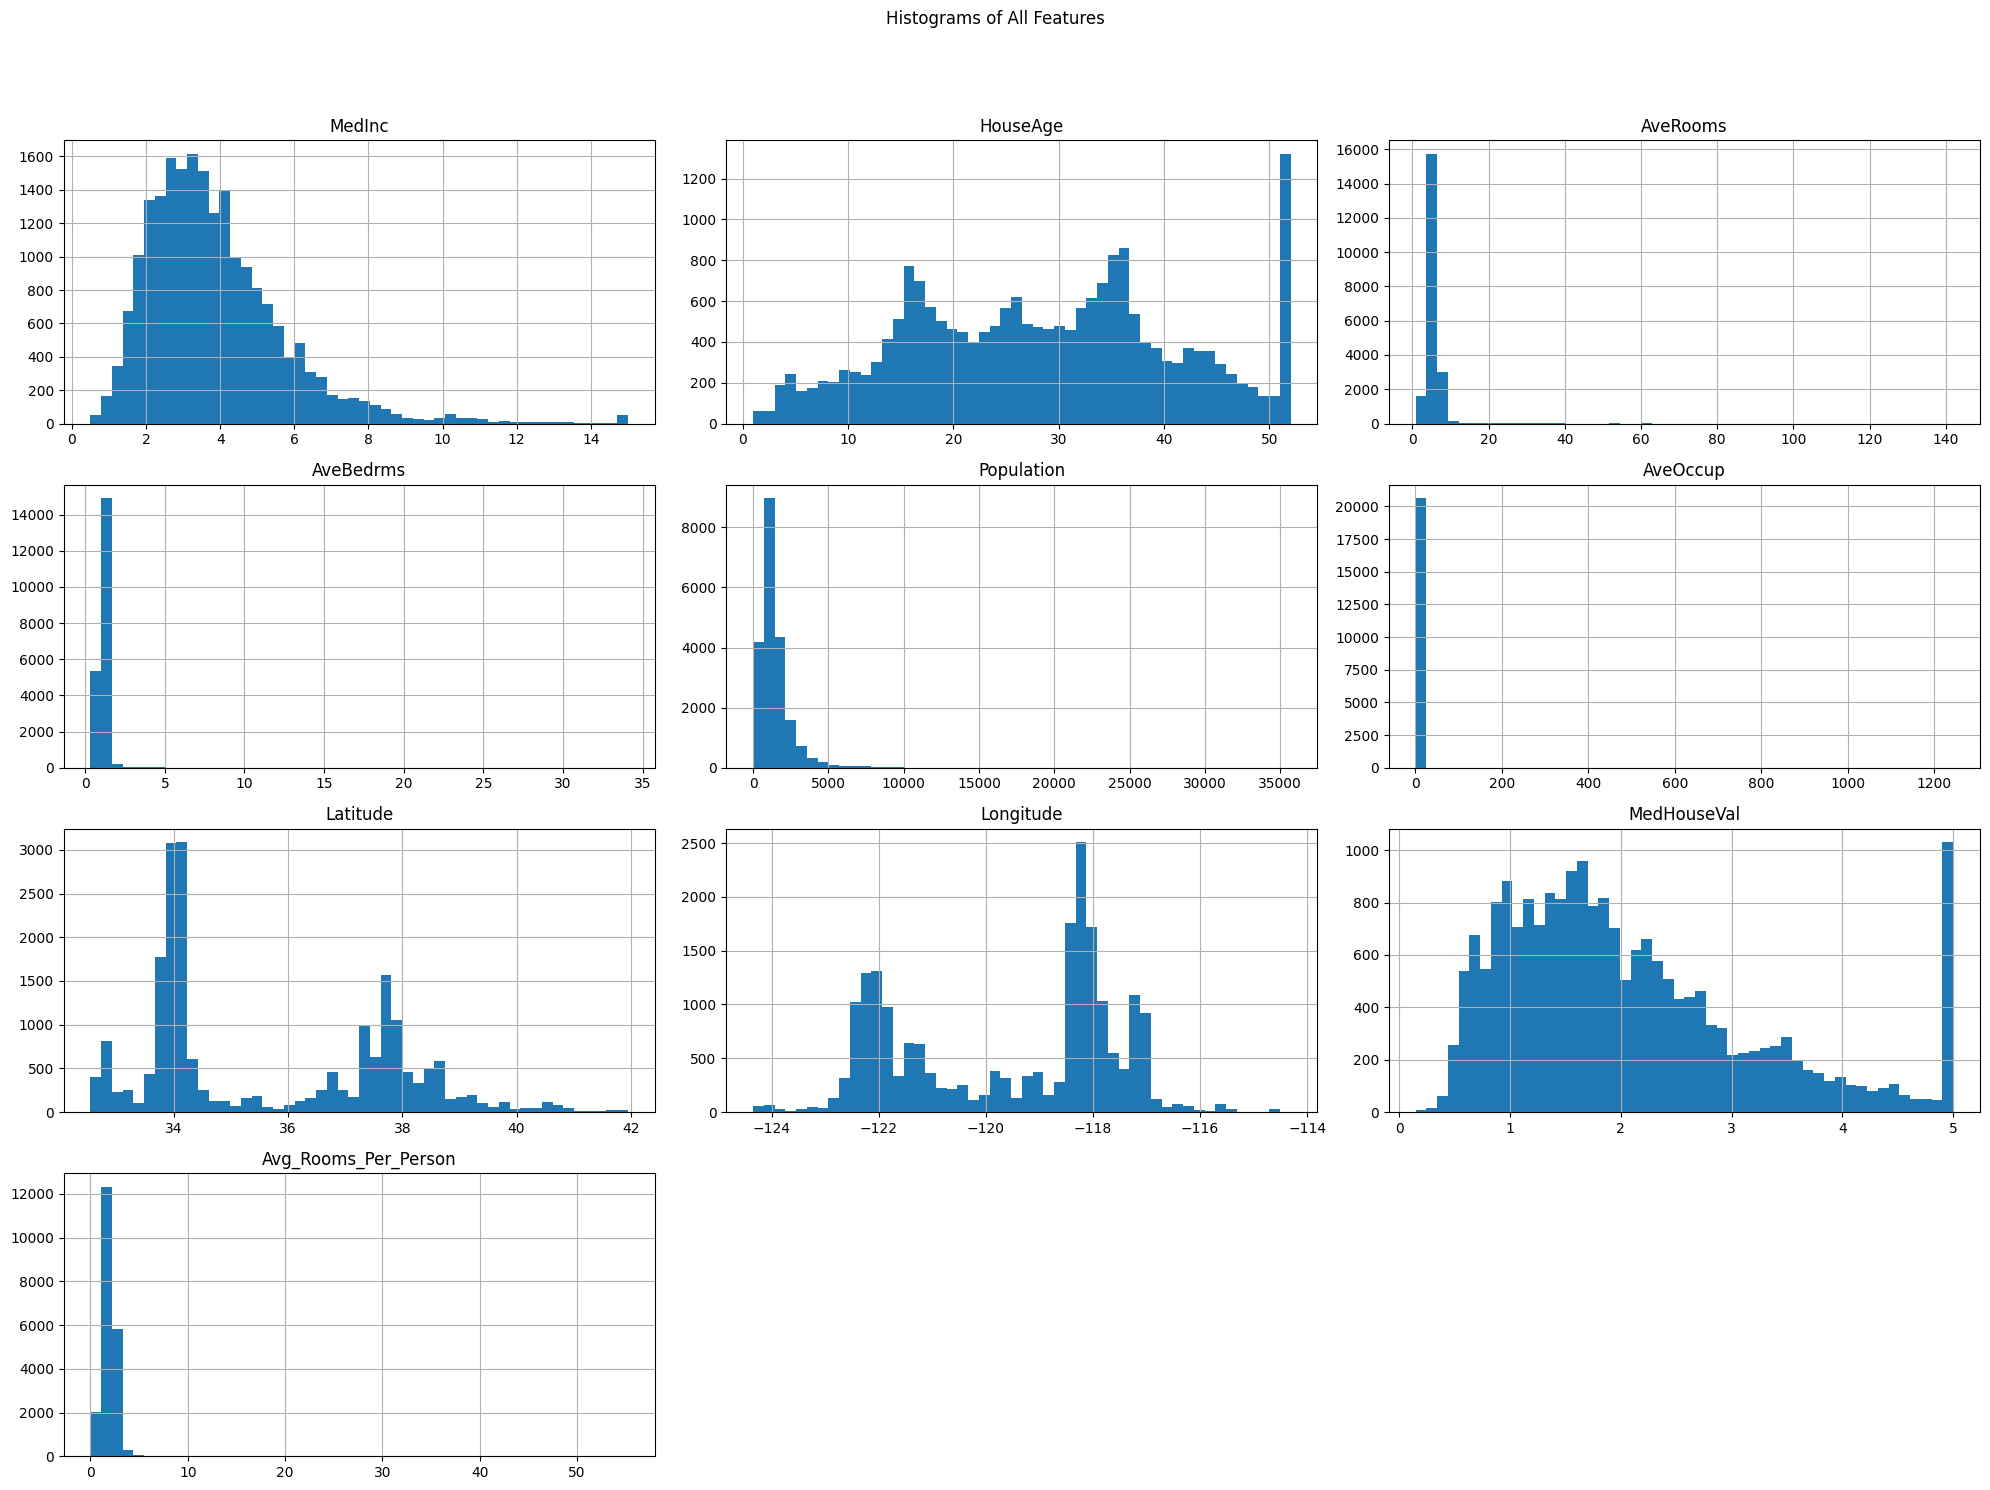

In [ ]:
# --- 3.1 Histograms of Features ---
# Visualize the distribution of each feature
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of All Features', y=1.02) # Add a title to the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

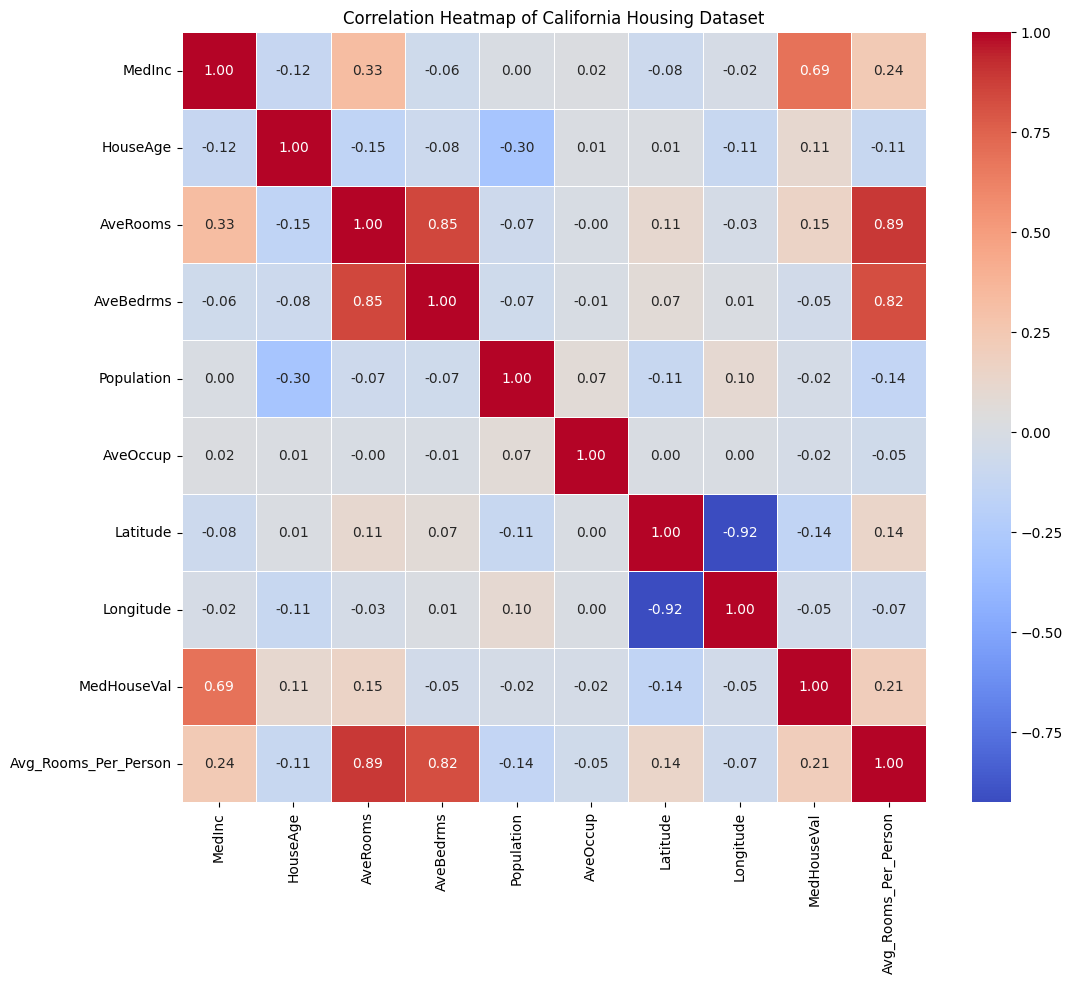

In [ ]:
# --- 3.2 Correlation Heatmap ---
# A heatmap visually represents the correlation matrix between all features and the target.
# It helps identify highly correlated features (which might indicate multicollinearity)
# and features strongly correlated with the target.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of California Housing Dataset')
plt.show()

In [ ]:
results = {}
def evaluate_model(model, X_test, y_test, model_name):
 """Trains the model, makes predictions, and prints evaluation metrics."""
 y_pred = model.predict(X_test)
 mae = mean_absolute_error(y_test, y_pred)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 r2 = r2_score(y_test, y_pred)
 print(f"\n--- {model_name} Performance ---")
 print(f"Mean Absolute Error (MAE): {mae:.4f}")
 print(f"Mean Squared Error (MSE): {mse:.4f}")
 print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
 print(f"R-squared (R²): {r2:.4f}")
 results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

 # Plot Actual vs. Predicted values
 plt.figure(figsize=(8, 6))
 plt.scatter(y_test, y_pred, alpha=0.3)
 plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
 plt.xlabel('Actual Values')
 plt.ylabel('Predicted Values')
 plt.title(f'{model_name}: Actual vs. Predicted Values')
 plt.grid(True)
 plt.show()


--- Training Linear Regression Model ---

--- Linear Regression Performance ---
Mean Absolute Error (MAE): 0.4959
Mean Squared Error (MSE): 0.4724
Root Mean Squared Error (RMSE): 0.6873
R-squared (R²): 0.6395


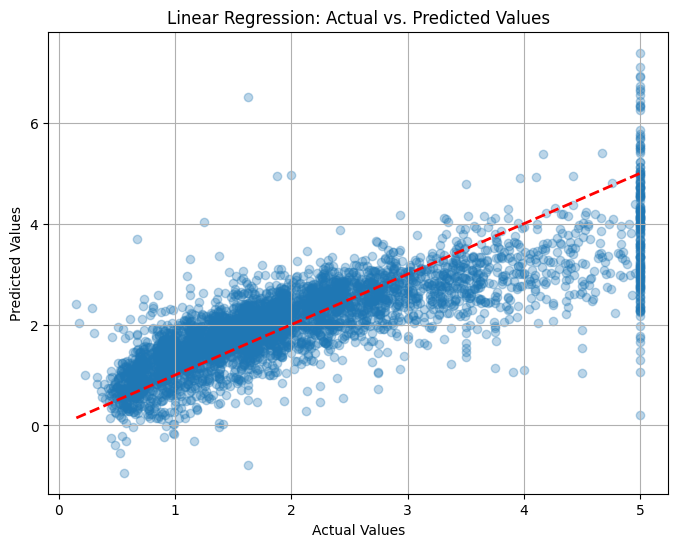

In [ ]:
# --- 4.1 Linear Regression ---
print("\n--- Training Linear Regression Model ---")
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
evaluate_model(lin_reg, X_test_scaled, y_test, 'Linear Regression')



--- Training Ridge Regression Model ---

--- Ridge Regression Performance ---
Mean Absolute Error (MAE): 0.4959
Mean Squared Error (MSE): 0.4724
Root Mean Squared Error (RMSE): 0.6873
R-squared (R²): 0.6395


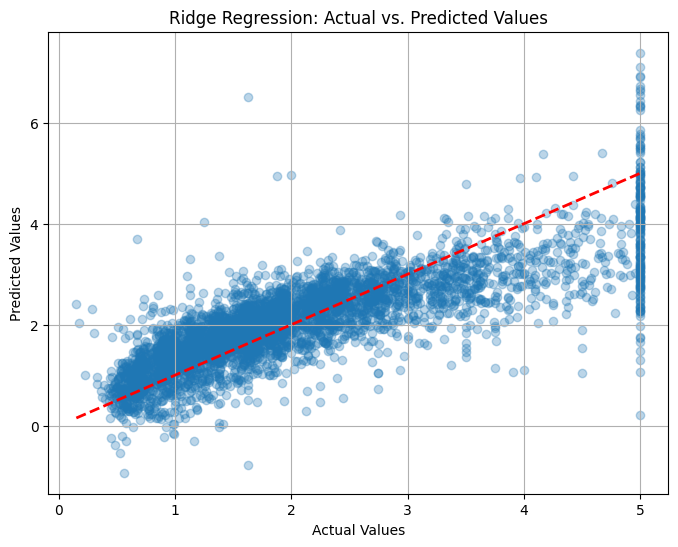

In [ ]:
# --- 4.2 Ridge Regression ---
print("\n\n--- Training Ridge Regression Model ---")
ridge_reg = Ridge(alpha=1.0) # alpha is the regularization strength
ridge_reg.fit(X_train_scaled, y_train)
evaluate_model(ridge_reg, X_test_scaled, y_test, 'Ridge Regression')



--- Training Decision Tree Regressor Model ---

--- Decision Tree Regressor Performance ---
Mean Absolute Error (MAE): 0.4540
Mean Squared Error (MSE): 0.5012
Root Mean Squared Error (RMSE): 0.7079
R-squared (R²): 0.6175


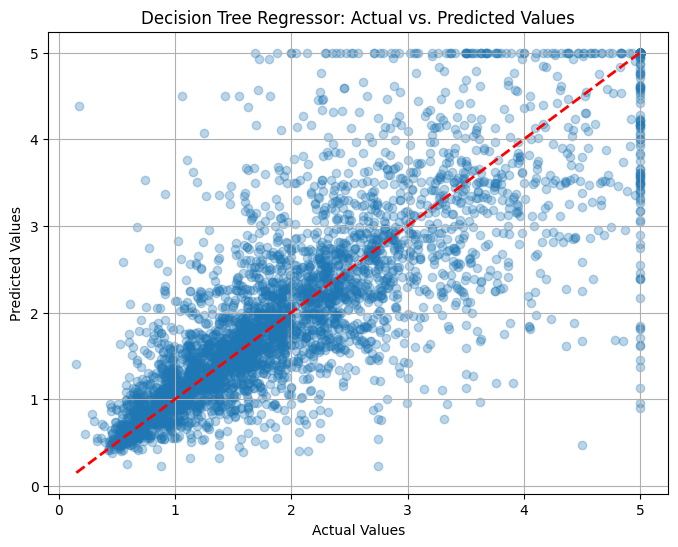

In [ ]:
# --- 4.3 Decision Tree Regressor ---
print("\n\n--- Training Decision Tree Regressor Model ---")
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train) # Note: Decision Trees are not sensitive to scaling
evaluate_model(dt_reg, X_test, y_test, 'Decision Tree Regressor')



--- Training Random Forest Regressor Model ---

--- Random Forest Regressor Performance ---
Mean Absolute Error (MAE): 0.3281
Mean Squared Error (MSE): 0.2546
Root Mean Squared Error (RMSE): 0.5046
R-squared (R²): 0.8057


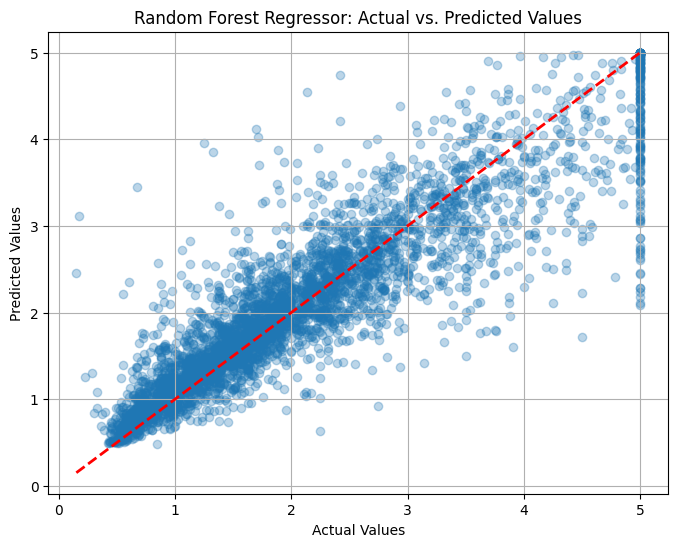

In [ ]:
# --- 4.4 Random Forest Regressor ---
print("\n\n--- Training Random Forest Regressor Model ---")
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_reg.fit(X_train, y_train) # Not sensitive to scaling
evaluate_model(rf_reg, X_test, y_test, 'Random Forest Regressor')



--- Training Gradient Boosting Regressor Model ---

--- Gradient Boosting Regressor Performance ---
Mean Absolute Error (MAE): 0.3661
Mean Squared Error (MSE): 0.2880
Root Mean Squared Error (RMSE): 0.5367
R-squared (R²): 0.7802


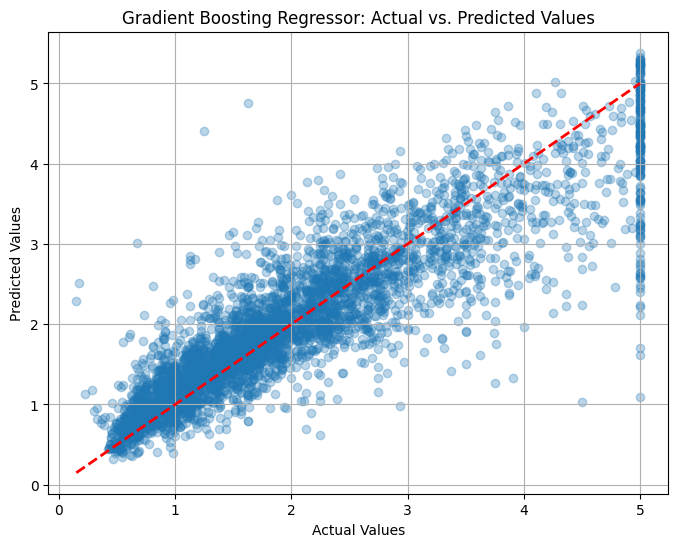

In [ ]:
# --- 4.5 Gradient Boosting Regressor ---
print("\n\n--- Training Gradient Boosting Regressor Model ---")
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
gb_reg.fit(X_train, y_train) # Not sensitive to scaling
evaluate_model(gb_reg, X_test, y_test, 'Gradient Boosting Regressor')

In [ ]:
# --- 5.1 Summarize All Model Results ---
results_df = pd.DataFrame(results).T # Transpose to have models as rows
print("\n--- Comparative Model Performance (Lower MAE/MSE/RMSE, Higher R2 is Better) ---")
print(results_df.sort_values(by='R-squared', ascending=False))


--- Comparative Model Performance (Lower MAE/MSE/RMSE, Higher R2 is Better) ---
                                  MAE       MSE      RMSE  R-squared
Random Forest Regressor      0.328091  0.254598  0.504577   0.805711
Gradient Boosting Regressor  0.366106  0.288017  0.536672   0.780209
Linear Regression            0.495886  0.472392  0.687308   0.639508
Ridge Regression             0.495888  0.472392  0.687308   0.639508
Decision Tree Regressor      0.453956  0.501166  0.707931   0.617550


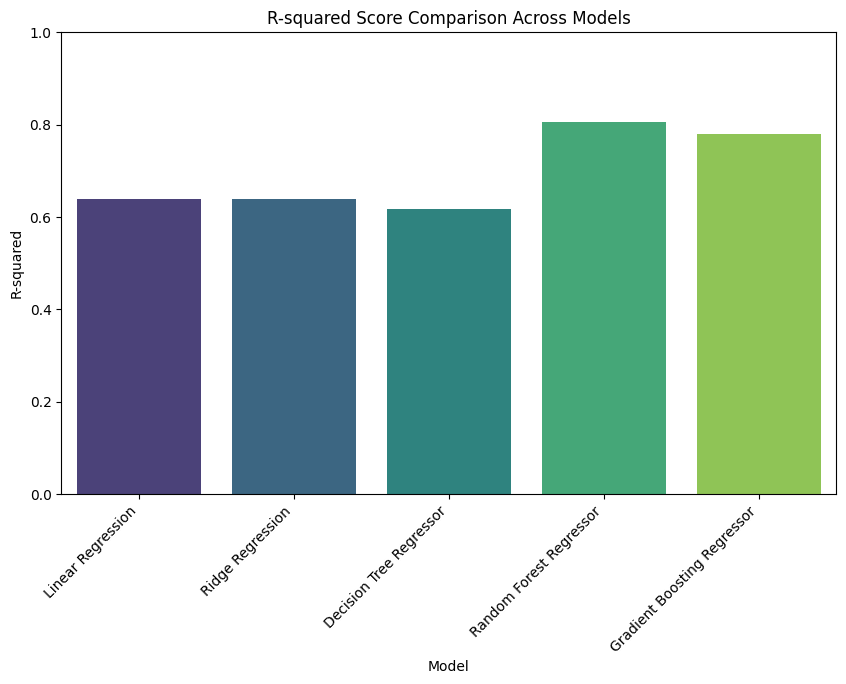

In [ ]:
# --- 4.2 Visualize R-squared scores ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R-squared'], palette='viridis')
plt.title('R-squared Score Comparison Across Models')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

<Axes: xlabel='None', ylabel='RMSE'>

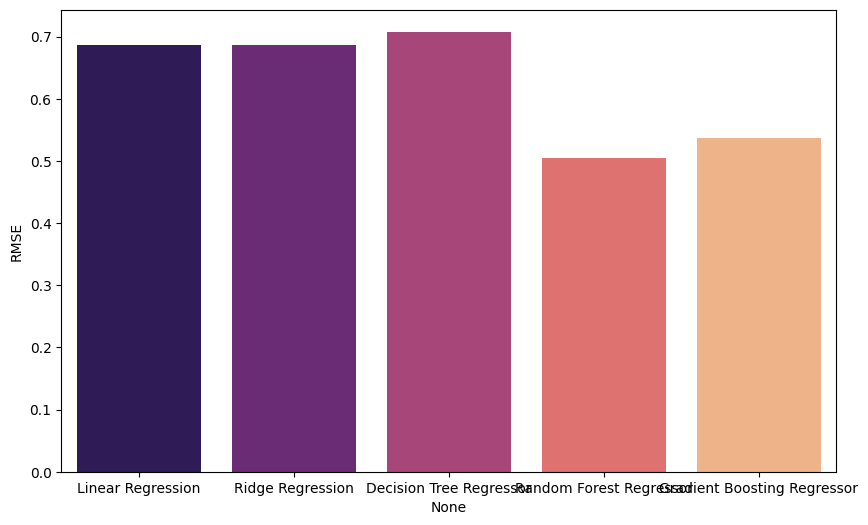

In [ ]:
# --- 5.3 Visualize RMSE scores ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette='magma')

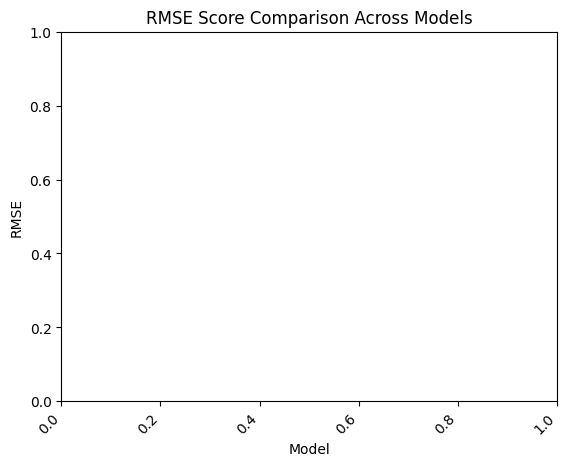

In [ ]:
plt.title('RMSE Score Comparison Across Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# --- Example: Making a prediction with the best model (Random Forest) ---
# Let's say we want to predict the value of a new hypothetical house district.
# We need to provide features in the same format and scale as the training data.
# Create a sample new data point (make sure it has the same columns as X_train)
# Values are example, replace with realistic data for actual use
new_data_point = pd.DataFrame([[
 5.0, # MedInc (Median Income in block group)
 40.0, # HouseAge (Median house age in block group)
 6.0, # AveRooms (Average number of rooms per household)
 1.5, # AveBedrms (Average number of bedrooms per household)
 1000.0, # Population (Block group population)
 3.0, # AveOccup (Average number of household members)
 34.0, # Latitude
 -118.0, # Longitude
 6.0/1.5 # Avg_Rooms_Per_Person (our engineered feature)
]], columns=X_train.columns)

In [ ]:
# Scale the new data point using the SAME SCALER fitted on training data
new_data_point_scaled = scaler.transform(new_data_point)
new_data_point_scaled = pd.DataFrame(new_data_point_scaled, columns=new_data_point.columns)

In [ ]:
# Predict using the Random Forest Regressor (which performed best)
predicted_value_rf = rf_reg.predict(new_data_point) # Use unscaled for tree-based
# If using a linear model (e.g., lin_reg), use new_data_point_scaled:
# predicted_value_lin = lin_reg.predict(new_data_point_scaled)
print(f"\n--- Prediction for a New Data Point (using Random Forest) ---")
print(f"Features of the new data point:\n{new_data_point.to_string()}")
print(f"Predicted Median House Value: ${predicted_value_rf[0]*100000:.2f}") # Multiply by 100k as per dataset description


--- Prediction for a New Data Point (using Random Forest) ---
Features of the new data point:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Avg_Rooms_Per_Person
0     5.0      40.0       6.0        1.5      1000.0       3.0      34.0     -118.0                   4.0
Predicted Median House Value: $280491.05
